In [1]:
import pandas as pd
from tqdm.auto import tqdm

# configuration
DATA_CSV = "books_cleaned.csv"
BATCH_SIZE = 32
LABELS = ["Fiction", "Non-fiction"]

# Load the cleaned dataset
books = pd.read_csv("books_cleaned.csv")

In [2]:
books["categories"].value_counts().reset_index()

,categories,count
0,Fiction,2111
1,Juvenile Fiction,390
2,Biography & Autobiography,311
3,History,207
4,Literary Criticism,124
...,...,...
474,Aged women,1
475,Imperialism,1
476,Human-animal relationships,1
477,Amish,1


In [3]:
books["categories"].value_counts().reset_index().query("count > 50")

,categories,count
0,Fiction,2111
1,Juvenile Fiction,390
2,Biography & Autobiography,311
3,History,207
4,Literary Criticism,124
5,Religion,117
6,Philosophy,117
7,Comics & Graphic Novels,116
8,Drama,86
9,Juvenile Nonfiction,57


In [4]:
category_mapping = {
    "Fiction": "Fiction",
    "Juvenile Fiction": "Children's Fiction",
    "Juvenile Non-fiction": "Children's Non-fiction",
    "Drama": "Fiction",
    "Mystery": "Fiction",
    "Philosophy": "Non-fiction",
    "Romance": "Fiction",
    "Thriller": "Fiction",
    "Literary Criticism": "Non-fiction",
    "Biography & Autobiography": "Non-fiction",
    "Comics & Graphic Novels": "Fiction",
    "Religion": "Non-fiction",
    "History": "Non-fiction",
    "Science": "Non-fiction",
    "poetry": "Fiction"
}

books["simple_categories"] = books["categories"].map(category_mapping)

In [5]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,A NOVEL THAT READERS and critics have been eag...,Fiction
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web:A Novel,A new 'Christie for Christmas' -- a full-lengt...,NaN
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"A memorable, mesmerizing heroine Jennifer -- b...",Fiction
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,Lewis' work on the nature of love divides love...,NaN
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"""In The Problem of Pain, C.S. Lewis, one of th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,On A Train Journey Home To North India After L...,NaN
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,This book tells the tale of a man who goes on ...,NaN
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,"Wisdom to Create a Life of Passion, Purpose, a...",NaN
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that:Talks with Sri Nisargadatta Maharaj,This collection of the timeless teachings of o...,Non-fiction


In [6]:
books[~(books["simple_categories"].isna())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,A NOVEL THAT READERS and critics have been eag...,Fiction
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"A memorable, mesmerizing heroine Jennifer -- b...",Fiction
8,9780006482079,0006482074,Warhost of Vastmark,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995.0,4.03,522.0,2966.0,Warhost of Vastmark,"Tricked once more by his wily half-brother, Ly...",Fiction
30,9780006646006,000664600X,Ocean Star Express,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002.0,3.50,32.0,1.0,Ocean Star Express,Joe and his parents are enjoying a summer holi...,Children's Fiction
46,9780007121014,0007121016,Taken at the Flood,Agatha Christie,Fiction,http://books.google.com/books/content?id=3gWlx...,A Few Weeks After Marrying An Attractive Young...,2002.0,3.71,352.0,8852.0,Taken at the Flood,A Few Weeks After Marrying An Attractive Young...,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5178,9781933648279,1933648279,Night Has a Thousand Eyes,Cornell Woolrich,Fiction,http://books.google.com/books/content?id=3Gk6s...,"""Cornell Woolrich's novels define the essence ...",2007.0,3.77,344.0,680.0,Night Has a Thousand Eyes,"""Cornell Woolrich's novels define the essence ...",Fiction
5188,9784770028969,4770028962,Coin Locker Babies,村上龍,Fiction,http://books.google.com/books/content?id=87DJw...,Rescued from the lockers in which they were le...,2002.0,3.75,393.0,5560.0,Coin Locker Babies,Rescued from the lockers in which they were le...,Fiction
5189,9788122200850,8122200850,"Cry, the Peacock",Anita Desai,Fiction,http://books.google.com/books/content?id=_QKwV...,This book is the story of a young girl obsesse...,1980.0,3.22,218.0,134.0,"Cry, the Peacock",This book is the story of a young girl obsesse...,Fiction
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that:Talks with Sri Nisargadatta Maharaj,This collection of the timeless teachings of o...,Non-fiction


In [7]:
import os

# Set Hugging Face cache to D: drive
os.environ["TRANSFORMERS_CACHE"] = "D:/huggingface_cache"
os.environ["HF_HOME"] = "D:/huggingface_cache"


In [8]:
from transformers import pipeline

classifier = pipeline(
    "zero-shot-classification",
    model="typeform/distilbert-base-uncased-mnli"
)

print("Pipeline is working!")


d:\book-recommender\.venv_Notebooks\Lib\site-packages\transformers\utils\hub.py:110: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
Device set to use cpu


Pipeline is working!


In [9]:
texts = books["tagged_description"].fillna("").astype(str).apply(lambda x: x[:512]).tolist()
candidate_labels = ["Fiction", "Non-fiction"]

predicted_labels = []
predicted_scores = []

for i in tqdm(range(0, len(texts), BATCH_SIZE)):
    batch = texts[i:i + BATCH_SIZE]
    results = classifier(batch, candidate_labels=candidate_labels, multi_label=False)
   
    for res in results:
        predicted_labels.append(res["labels"][0])
        predicted_scores.append(res["scores"][0])


  0%|          | 0/163 [00:00<?, ?it/s]

In [10]:
books["predicted_category"] = predicted_labels
books["predicted_category_score"] = predicted_scores

In [11]:
books.to_csv("books_classified.csv", index=False)


In [12]:
books[["title_and_subtitle", "predicted_category", "predicted_category_score"]].head(10)


,title_and_subtitle,predicted_category,predicted_category_score
0,Gilead,Fiction,0.708725
1,Spider's Web:A Novel,Fiction,0.575721
2,Rage of angels,Fiction,0.689205
3,The Four Loves,Non-fiction,0.580771
4,The Problem of Pain,Fiction,0.527924
5,Empires of the Monsoon:A History of the Indian...,Non-fiction,0.613737
6,The Gap Into Madness:Chaos and Order,Fiction,0.568114
7,Master of the Game,Fiction,0.646029
8,Warhost of Vastmark,Fiction,0.848836
9,The Once and Future King,Fiction,0.801612


<Axes: title={'center': 'Books per Predicted Category'}, xlabel='predicted_category'>

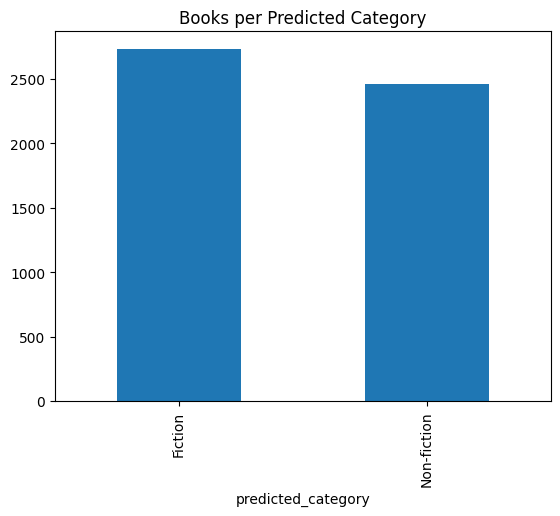

In [13]:
# Visualizing predictions
books['predicted_category'].value_counts().plot(kind='bar', title="Books per Predicted Category")
